In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [5]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
data.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

<AxesSubplot:>

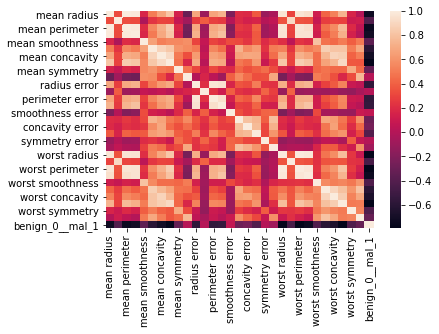

In [11]:
sns.heatmap(data.corr())

In [12]:
#mostly neagtively corelated ..inversly propostional

In [13]:
from sklearn.model_selection import train_test_split

In [21]:
x=data.drop(['benign_0__mal_1'],axis=1).values
y=data['benign_0__mal_1'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
sc=MinMaxScaler()

In [24]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
data.shape

(569, 31)

In [33]:
sq=Sequential()

sq.add(Dense(31,activation='relu'))
sq.add(Dense(15,activation='relu'))
sq.add(Dense(1,activation='sigmoid'))#because the ans is btwn 0 to 1..read notes

sq.compile(loss='binary_crossentropy',optimizer='adam')

In [34]:
sq.fit(x_train,y_train,epochs=600,validation_data=(x_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 23ms/step - loss: 0.6710 - val_loss: 0.6455
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6281 - val_loss: 0.5982
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5826 - val_loss: 0.5475
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5386 - val_loss: 0.4999
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4876 - val_loss: 0.4397
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4293 - val_loss: 0.3849
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3849 - val_loss: 0.3444
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3445 - val_loss: 0.3101
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3086 - val_loss: 0.2813
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2808 - val_loss: 0.2582
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0416 - val_loss: 0.0663
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0420 - val_loss: 0.0657
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0421 - val_loss: 0.0649
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0411 - val_loss: 0.0661
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0403 - val_loss: 0.0647
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0415 - val_loss: 0.0657
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0397 - val_loss: 0.0656
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0405 - val_loss: 0.0649
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0385 - val_loss: 0.0645
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0400 - val_loss: 0.0651
Epoch 93/600


14/14 [==============================] - 0s 5ms/step - loss: 0.0233 - val_loss: 0.0588
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0232 - val_loss: 0.0609
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.0599
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0226 - val_loss: 0.0623
Epoch 168/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0214 - val_loss: 0.0587
Epoch 169/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0228 - val_loss: 0.0623
Epoch 170/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0258 - val_loss: 0.0573
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.0605
Epoch 172/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0215 - val_loss: 0.0611
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0218 - val_loss: 0.0598
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.0678
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0167 - val_loss: 0.0673
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0134 - val_loss: 0.0616
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0125 - val_loss: 0.0605
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0130 - val_loss: 0.0619
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0141 - val_loss: 0.0678
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0131 - val_loss: 0.0625
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0163 - val_loss: 0.0606
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0140 - val_loss: 0.0678
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.0610
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.0759
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0073 - val_loss: 0.0670
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.0731
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0646
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0071 - val_loss: 0.0733
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0684
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.0706
Epoch 333/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0075 - val_loss: 0.0738
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0701
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.0673
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0761
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0804
Epoch 409/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0806
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.0795
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0038 - val_loss: 0.0799
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0834
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0041 - val_loss: 0.0819
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0043 - val_loss: 0.0805
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0038 - val_loss: 0.0776
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0040 - val_loss: 0.0864
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0946
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0941
Epoch 490/600
14/14 [==============================] - ETA: 0s - loss: 0.002 - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0937
Epoch 491/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0974
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0935
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0969
Epoch 494/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0021 - val_loss: 0.0928
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0991
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0969
Epoch 497/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0019

14/14 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.1172
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.1154
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.1108
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.1057
Epoch 573/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.1119
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.1115
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.1121
Epoch 576/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.1087
Epoch 577/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0013 - val_loss: 0.1103
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 8.8735e-04 - val_loss: 0.1147


In [36]:
loss=pd.DataFrame(sq.history.history)

<AxesSubplot:>

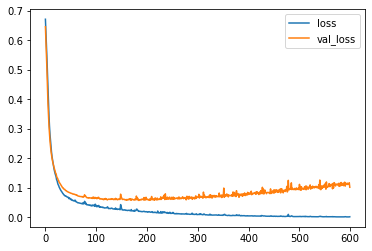

In [37]:
loss.plot()

In [38]:
#we can avoid overfitting by two ways Stop

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
stop=EarlyStopping(monitor='val_loss',mode='min',patience=15)

In [49]:
#to train newly
sq=Sequential()

sq.add(Dense(31,activation='relu'))
sq.add(Dense(15,activation='relu'))
sq.add(Dense(1,activation='sigmoid'))#because the ans is btwn 0 to 1..read notes

sq.compile(loss='binary_crossentropy',optimizer='adam')

In [50]:
sq.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=600,callbacks=stop)

Epoch 1/600
14/14 [==============================] - 0s 17ms/step - loss: 0.6787 - val_loss: 0.6665
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6445 - val_loss: 0.6314
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6134 - val_loss: 0.5968
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5801 - val_loss: 0.5573
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5419 - val_loss: 0.5116
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4980 - val_loss: 0.4652
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4552 - val_loss: 0.4194
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4113 - val_loss: 0.3754
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3709 - val_loss: 0.3346
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3329 - val_loss: 0.2983
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0495 - val_loss: 0.0685
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0501 - val_loss: 0.0680
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0503 - val_loss: 0.0672
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0483 - val_loss: 0.0670
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0495 - val_loss: 0.0670
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0524 - val_loss: 0.0670
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0532 - val_loss: 0.0672
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0497 - val_loss: 0.0682
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0488 - val_loss: 0.0681
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0464 - val_loss: 0.0675
Epoch 93/600


<AxesSubplot:>

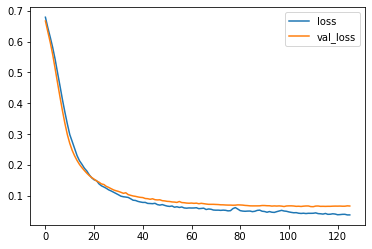

In [51]:
pd.DataFrame(sq.history.history).plot()

In [52]:
from tensorflow.keras.layers import Dropout

In [53]:
#to train newly
sq=Sequential()

sq.add(Dense(31,activation='relu'))
sq.add(Dropout(0.5))

sq.add(Dense(15,activation='relu'))
sq.add(Dropout(0.5))

sq.add(Dense(1,activation='sigmoid'))#because the ans is btwn 0 to 1..read notes

sq.compile(loss='binary_crossentropy',optimizer='adam')

In [54]:
sq.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=600,callbacks=stop)

Epoch 1/600
14/14 [==============================] - 0s 12ms/step - loss: 0.7155 - val_loss: 0.6678
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6940 - val_loss: 0.6655
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6581 - val_loss: 0.6517
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6556 - val_loss: 0.6311
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6373 - val_loss: 0.6057
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6443 - val_loss: 0.5826
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6236 - val_loss: 0.5618
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6035 - val_loss: 0.5389
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5831 - val_loss: 0.5194
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5663 - val_loss: 0.4901
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.1127 - val_loss: 0.0953
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1073 - val_loss: 0.0884
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1264 - val_loss: 0.0955
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1262 - val_loss: 0.0930
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1189 - val_loss: 0.0934
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0992 - val_loss: 0.0895
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1136 - val_loss: 0.0920
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1163 - val_loss: 0.0837
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0958 - val_loss: 0.0827
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1071 - val_loss: 0.0848
Epoch 93/600


<AxesSubplot:>

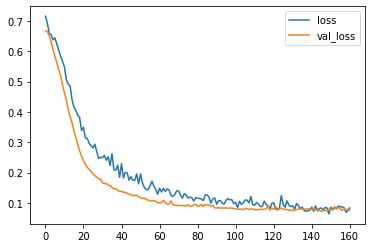

In [55]:
pd.DataFrame(sq.history.history).plot()

In [56]:
from sklearn.metrics import confusion_matrix,classification_report

In [60]:
pred=sq.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [62]:
confusion_matrix(y_test,pred)

array([[57,  2],
       [ 2, 82]], dtype=int64)

In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.98      0.98      0.98        84

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

